# File and libraries

In [18]:
import pandas as pd

# https://www.kaggle.com/datasets/mkechinov/ecommerce-behavior-data-from-multi-category-store

compressed_link=r'https://data.rees46.com/datasets/marketplace/2020-Apr.csv.gz'
filepath=r'2020-Apr.csv'


file_tag = "ecommerce behaviour"


## DSLabs

In [19]:
%run "dslabs_functions.py"


# Load

In [20]:
data=pd.read_csv(filepath)

data.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2020-04-01 00:00:00 UTC,view,1201465,2232732101407408685,apparel.shoes.slipons,samsung,230.38,568984877,e2456cef-2d4f-42b9-a53a-8893cb0c6851
1,2020-04-01 00:00:01 UTC,view,1307156,2053013554658804075,electronics.audio.headphone,apple,1352.67,514955500,38f43134-de83-4710-ae0a-326677d292c6
2,2020-04-01 00:00:01 UTC,view,1480477,2053013563835941749,appliances.kitchen.refrigerators,apple,1184.05,633645770,16aba270-b3c2-4b23-be0a-b7c80bc9da9e
3,2020-04-01 00:00:02 UTC,view,1307050,2053013554658804075,electronics.audio.headphone,apple,1724.34,564933778,05b443bd-e68a-4d72-b971-80bd31109cb8
4,2020-04-01 00:00:03 UTC,view,9500109,2232732104175649385,apparel.scarf,defender,25.05,530206135,e3c1fb4b-0a7e-457d-a0cf-5d1479e9aafc


# Dimensionality

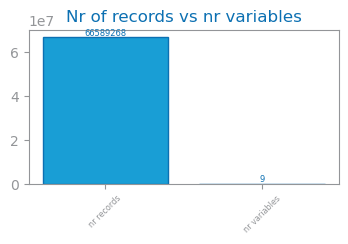

In [21]:
from matplotlib.pyplot import figure, savefig, show
from dslabs_functions import plot_bar_chart

figure(figsize=(4, 2))
values: dict[str, int] = {"nr records": data.shape[0], "nr variables": data.shape[1]}
plot_bar_chart(
    list(values.keys()), list(values.values()), title="Nr of records vs nr variables"
)
# savefig(f"images/{file_tag}_records_variables.png")
show()

## Missing values

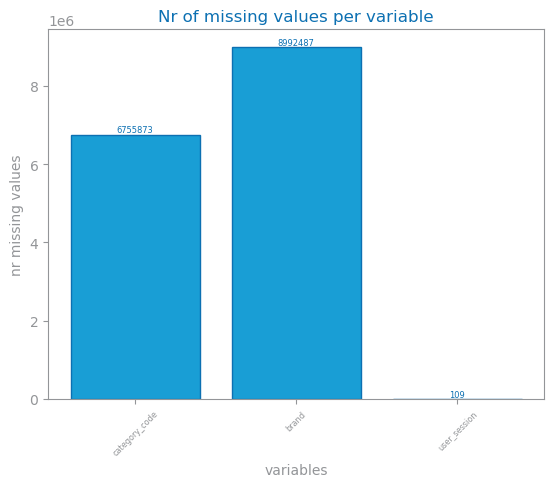

In [9]:
mv: dict[str, int] = {}
for var in data.columns:
    nr: int = data[var].isna().sum()
    if nr > 0:
        mv[var] = nr

figure()
plot_bar_chart(
    list(mv.keys()),
    list(mv.values()),
    title="Nr of missing values per variable",
    xlabel="variables",
    ylabel="nr missing values",
)
# savefig(f"images/{file_tag}_mv.png")
show()

## Variables Type

In [12]:
data.dtypes


event_time        object
event_type        object
product_id         int64
category_id        int64
category_code     object
brand             object
price            float64
user_id            int64
user_session      object
dtype: object

In [24]:
from pandas import Series, to_numeric, to_datetime


def get_variable_types(df: DataFrame) -> dict[str, list]:
    variable_types: dict = {"numeric": [], "binary": [], "date": [], "symbolic": []}

    nr_values: Series = df.nunique(axis=0, dropna=True)
    for c in df.columns:
        if 2 == nr_values[c]:
            variable_types["binary"].append(c)
            df[c].astype("bool")
        else:
            try:
                to_numeric(df[c], errors="raise")
                variable_types["numeric"].append(c)
            except ValueError:
                try:
                    df[c] = to_datetime(df[c], errors="raise")
                    variable_types["date"].append(c)
                except ValueError:
                    variable_types["symbolic"].append(c)

    return variable_types


variable_types: dict[str, list] = get_variable_types(data)
print(variable_types)

{'numeric': ['product_id', 'category_id', 'price', 'user_id'], 'binary': [], 'date': ['event_time'], 'symbolic': ['event_type', 'category_code', 'brand', 'user_session']}


## box plot variables

{'numeric': ['product_id', 'category_id', 'price', 'user_id'], 'binary': [], 'date': ['event_time'], 'symbolic': ['event_type', 'category_code', 'brand', 'user_session']}


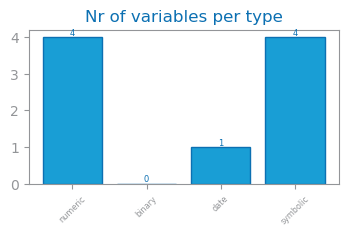

In [14]:
counts: dict[str, int] = {}
for tp in variable_types.keys():
    counts[tp] = len(variable_types[tp])

figure(figsize=(4, 2))
plot_bar_chart(
    list(counts.keys()), list(counts.values()), title="Nr of variables per type"
)
# savefig(f"{file_tag}_variable_types.png")
show()

# Data Distribution

## describe

In [15]:
summary5: DataFrame = data.describe(include="all")
summary5

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
count,66589268,66589268,6.658927e+07,6.658927e+07,59833395,57596781,6.658927e+07,6.658927e+07,66589159
unique,NaN,3,NaN,NaN,141,4885,NaN,NaN,11652261
top,NaN,view,NaN,NaN,construction.tools.light,samsung,NaN,NaN,060b5762-741f-4825-94c5-d1b3e2f7bd27
freq,NaN,62353909,NaN,NaN,14325436,8001862,NaN,NaN,34570
mean,2020-04-17 14:12:25.991101696+00:00,NaN,3.519020e+07,2.180717e+18,NaN,NaN,2.733338e+02,5.827744e+08,NaN
min,2020-04-01 00:00:00+00:00,NaN,1.000365e+06,2.053014e+18,NaN,NaN,0.000000e+00,2.739622e+07,NaN
25%,2020-04-11 01:29:45+00:00,NaN,2.602135e+06,2.053014e+18,NaN,NaN,5.146000e+01,5.335062e+08,NaN
50%,2020-04-18 04:55:36+00:00,NaN,1.220091e+07,2.232732e+18,NaN,NaN,1.489100e+02,5.876208e+08,NaN
75%,2020-04-24 17:26:38+00:00,NaN,1.000224e+08,2.232732e+18,NaN,NaN,3.423500e+02,6.337795e+08,NaN
max,2020-04-30 23:59:59+00:00,NaN,1.002342e+08,2.298841e+18,NaN,NaN,2.574070e+03,6.497760e+08,NaN


## numeric Variables

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Data\\Coding\\Python\\ist_dash_2024_rec\\notebooks\\ecommerce_behaviour\\images\\ecommerce behaviour_global_boxplot.png'

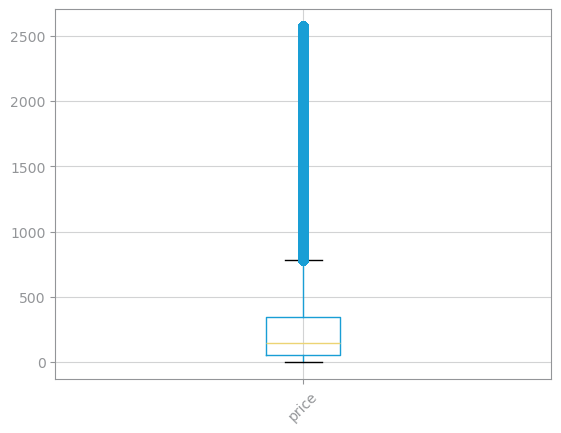

In [26]:
from matplotlib.pyplot import savefig, show


# variables_types: dict[str, list] = get_variable_types(data)
# numeric: list[str] = variables_types["numeric"]

# price is the only actual numeric variable as others are identifiers so might as well and filter for it
numeric: list[str] = ["price"]

if [] != numeric:
    data[numeric].boxplot(rot=45)
    savefig(f"{file_tag}_global_boxplot.png")
    show()
else:
    print("There are no numeric variables.")

In [ ]:
# from numpy import ndarray
# from matplotlib.figure import Figure
# from matplotlib.pyplot import savefig, show, subplots
# from dslabs_functions import define_grid, HEIGHT

# if [] != numeric:
#     rows: int
#     cols: int
#     rows, cols = define_grid(len(numeric))
#     fig: Figure
#     axs: ndarray
#     fig, axs = subplots(
#         rows, cols, figsize=(cols * HEIGHT, rows * HEIGHT), squeeze=False
#     )
#     i, j = 0, 0
#     for n in range(len(numeric)):
#         axs[i, j].set_title("Boxplot for %s" % numeric[n])
#         axs[i, j].boxplot(data[numeric[n]].dropna().values)
#         i, j = (i + 1, 0) if (n + 1) % cols == 0 else (i, j + 1)
#     savefig(f"images/{file_tag}_single_boxplots.png")
#     show()
# else:
#     print("There are no numeric variables.")

# Balancing and class distribution

In [ ]:
target = ['event_type']=='purchase'

values: Series = data[target].value_counts()
print(values)

figure(figsize=(4, 2))
plot_bar_chart(
    values.index.to_list(),
    values.to_list(),
    title=f"Target distribution (target={target})",
)
savefig(f"images/{file_tag}_class_distribution.png")
show()

# Symbolic Variables

In [28]:
from dslabs_functions import plot_bar_chart

symbolic: list[str] = variable_types["symbolic"] + variable_types["binary"]
if [] != symbolic:
    rows, cols = define_grid(len(symbolic))
    fig, axs = subplots(
        rows, cols, figsize=(cols * HEIGHT, rows * HEIGHT), squeeze=False
    )
    i, j = 0, 0
    for n in range(len(symbolic)):
        counts: Series = data[symbolic[n]].value_counts()
        plot_bar_chart(
            counts.index.to_list(),
            counts.to_list(),
            ax=axs[i, j],
            title="Histogram for %s" % symbolic[n],
            xlabel=symbolic[n],
            ylabel="nr records",
            percentage=False,
        )
        i, j = (i + 1, 0) if (n + 1) % cols == 0 else (i, j + 1)
    savefig(f"{file_tag}_histograms_symbolic.png")
    show()
else:
    print("There are no symbolic variables.")